In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


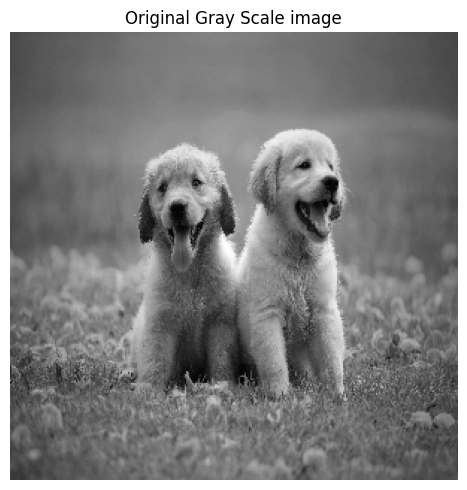

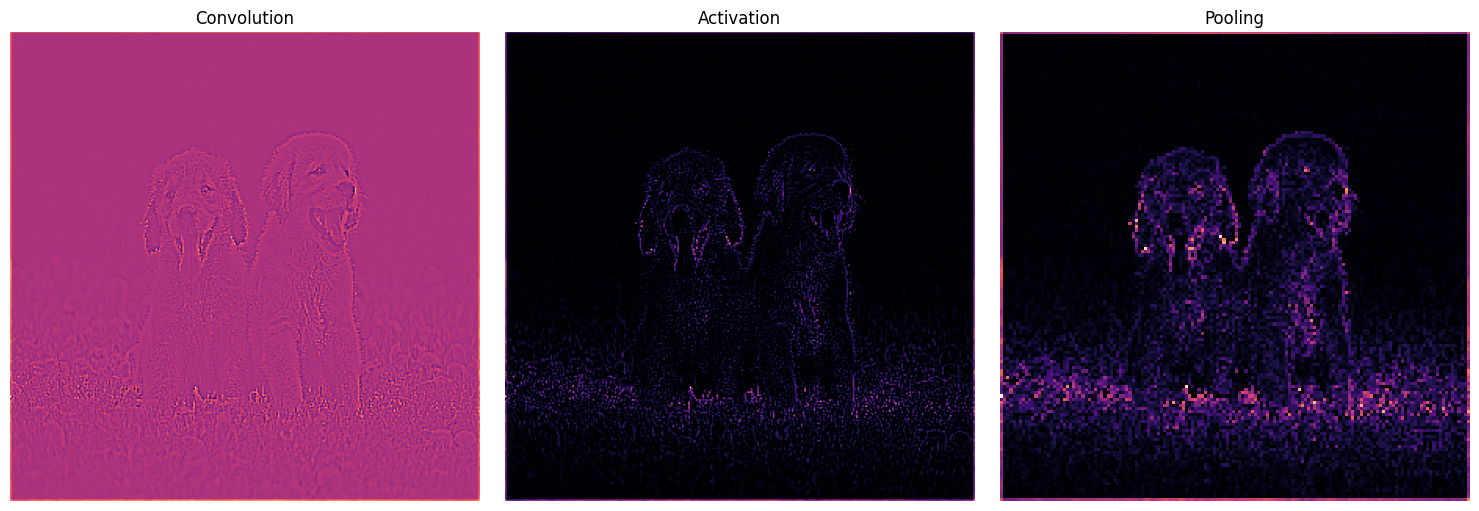

In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# load the image
image = tf.io.read_file('/content/drive/MyDrive/Colab Notebooks/dog.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


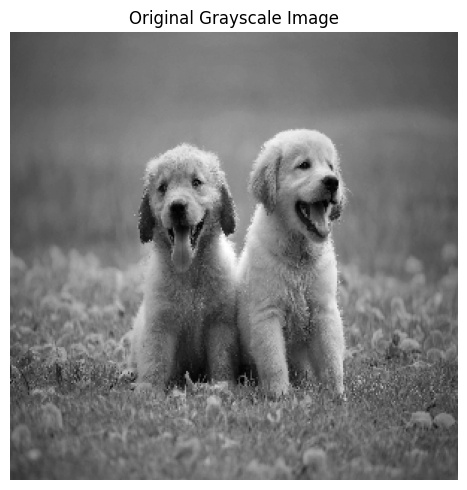

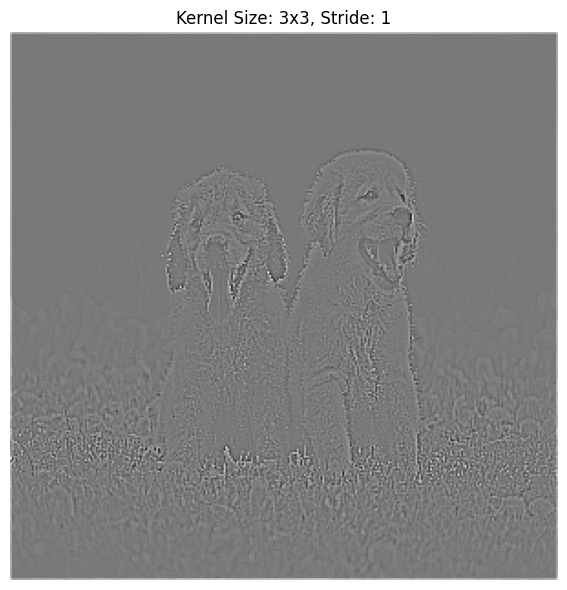

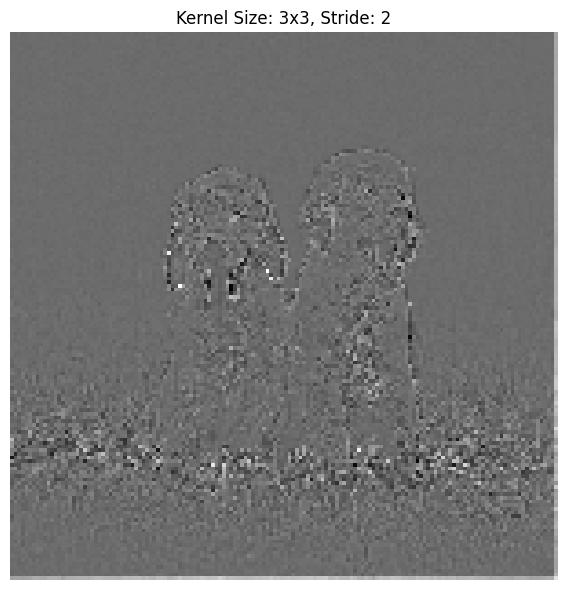

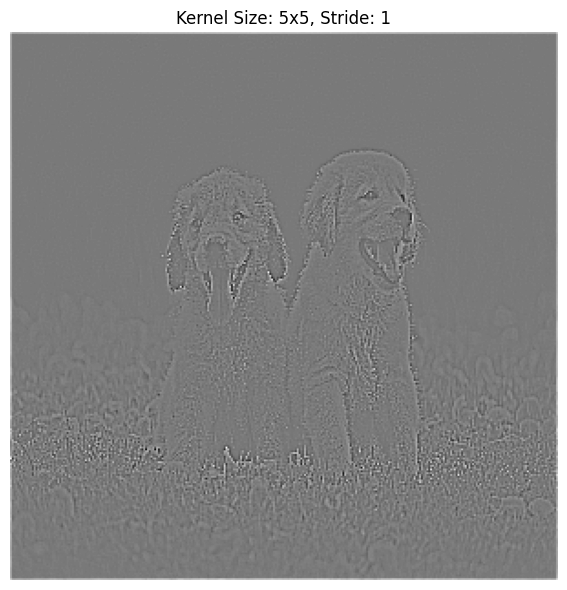

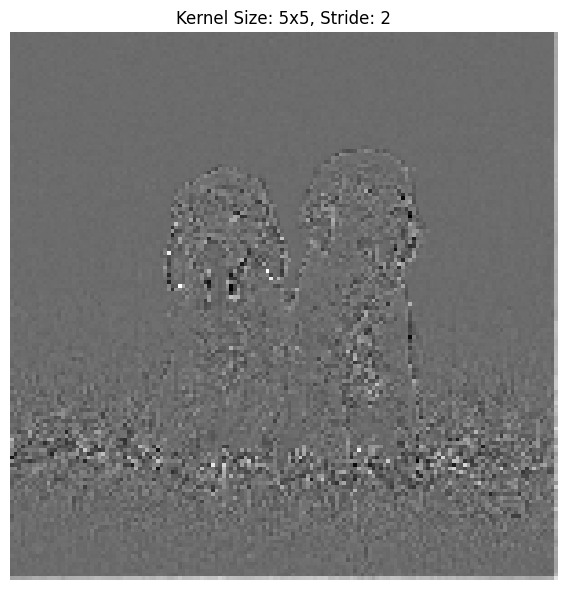

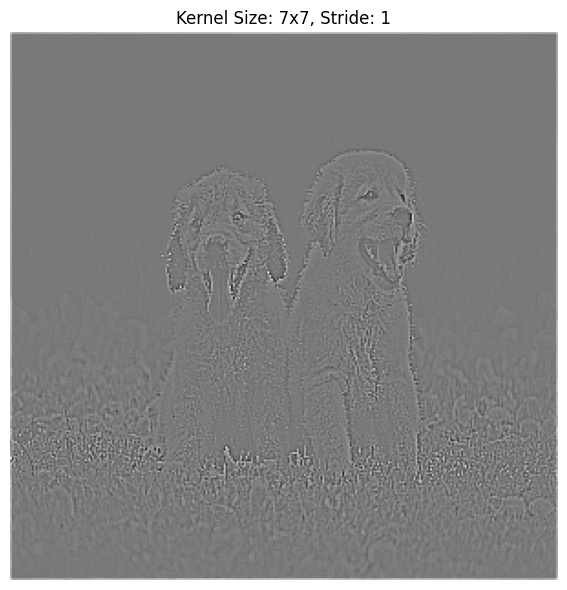

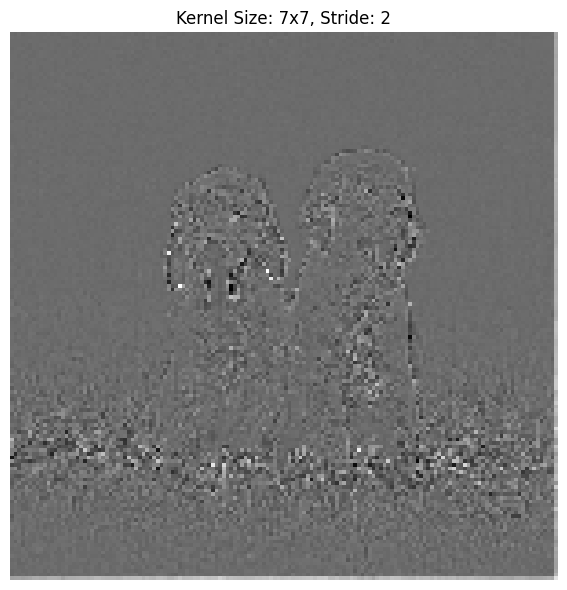

In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the parameters for visualization
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Load and preprocess the image
image = tf.io.read_file('/content/drive/MyDrive/Colab Notebooks/dog.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# Plot the original grayscale image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.show()

# Reformat the image for TensorFlow operations
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

# Define a function to visualize the effect of kernel size and stride
def apply_convolution(image, kernel_size, stride):
    # Create a kernel (simple edge detection kernel)
    kernel = tf.constant([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])
    # Pad the kernel to the desired size instead of resizing
    # Calculate padding for each dimension
    pad_h = (kernel_size - 3) // 2  # 3 is the original kernel size
    pad_w = (kernel_size - 3) // 2

    # Pad the kernel using tf.pad
    kernel = tf.pad(kernel, [[pad_h, pad_h], [pad_w, pad_w]], mode='CONSTANT')

    kernel = tf.reshape(kernel, [kernel_size, kernel_size, 1, 1])
    kernel = tf.cast(kernel, dtype=tf.float32)

    # Apply convolution
    conv_fn = tf.nn.conv2d
    convolved_image = conv_fn(
        input=image,
        filters=kernel,
        strides=(stride, stride),
        padding='SAME',
    )

    # Visualize the output
    plt.figure(figsize=(6, 6))
    plt.imshow(tf.squeeze(convolved_image).numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f"Kernel Size: {kernel_size}x{kernel_size}, Stride: {stride}")
    plt.show()

# Test different combinations of kernel size and stride
kernel_sizes = [3, 5, 7]  # Explore small and large kernels
strides = [1, 2]          # Explore small and large strides

# Apply and visualize each combination
for kernel_size, stride in [(k, s) for k in kernel_sizes for s in strides]:
    apply_convolution(image, kernel_size, stride)